# DZ 1 Немного EDA для маркетинговых данных

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

## Задание 1 (1 балл): предобработка данных

Откройте предложенные данные.

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
data = pd.read_csv("marketing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [14]:
# Некорретно представлены данные в столбцах Income (здесь логичнее, чтобы тип данных был float, т.к. у всех данных одна единица измерения - доллары)
# А также данные в столбике Dt_Customer, так там представлена дата, однако ее формат python воспринимает как строку

In [15]:
print(data.dtypes)
data.head(5)

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [11]:
for i in data.loc[~data['Income'].isnull(), 'Income'].index:
    data.loc[i, 'Income'] = float(str(data.loc[i, 'Income']).lstrip('$').replace(',',''))


Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [19]:
data['Dt_Customer'] = data['Dt_Customer'].apply(lambda x: '20' + x.split('/')[2] + "/" + x.split('/')[0] + "/" + x.split('/')[1])

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [242]:
data.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Response               False
Complain               False
Country                False
dtype: bool

In [243]:
data['Income'].isna().sum()

24

24 пропуска в Income, заполним пропуск предыдущим валидным значением https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [244]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

https://www.machinelearningmastery.ru/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623/
посмотрим, где в наших данных минимум и максимум сильно отличатеся от среднего и построим для них графики

In [245]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


https://seaborn.pydata.org/generated/seaborn.boxplot.html

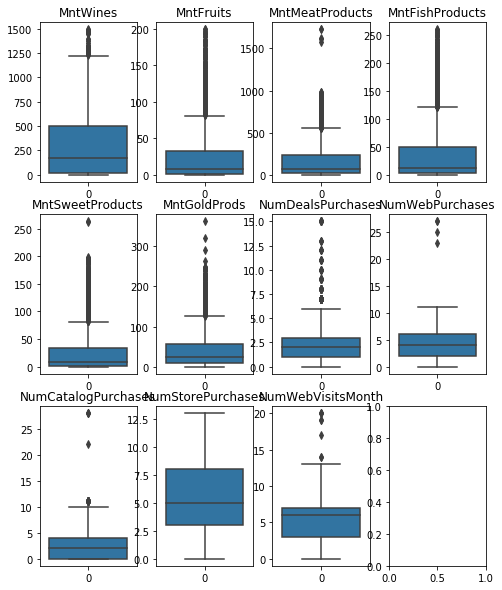

In [270]:
f, ax = plt.subplots(figsize=(8,10), nrows=3, ncols=4)
for i,p in zip(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
          'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], itertools.product([0,1,2,3],repeat=2)):
    sns.boxplot(data=data[i], ax=ax[p[0]][p[1]])
    ax[p[0]][p[1]].set_title(i)

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

https://ru.stackoverflow.com/questions/824550/Как-применить-функцию-ко-всем-значениям-колонки-в-pandas

добавим суммарные траты покупателя, чтобы иметь понимание, о том, сколько он приносит нам прибыли

In [273]:
data['TotalSum'] = data.apply(lambda x: x['MntWines'] + x['MntFruits'] + x['MntFishProducts'] + x['MntSweetProducts'] + x['MntMeatProducts'] + x['MntGoldProds'], axis=1)

добавим признак количество людей в семье, это поможет понять, на сколько человек происходит заказ

In [275]:
data['NumFam'] = data.apply(lambda d: 1 + d['Teenhome'] + d['Kidhome'] + (d['Marital_Status'] == 'Together' or d['Marital_Status'] == 'Married'), axis=1)

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

http://dfedorov.spb.ru/pandas/Использование%20типа%20данных%20категории%20в%20pandas.html

In [286]:
(data.dtypes == "object")

ID                     False
Year_Birth             False
Education               True
Marital_Status          True
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer             True
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Response               False
Complain               False
Country                 True
TotalSum               False
NumFam                 False
dtype: bool

In [289]:
for i in ['Education', 'Marital_Status', 'Country']:
    print(data[i].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64


большинство наших покупателей из испании и имеют высшее образование

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [290]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,TotalSum,NumFam
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,605.798214,2.595089
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,602.249288,0.906959
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,2.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,3.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000,3.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,5.000000


в среднем нашими услугами пользуются семьи из 3 человек
больше всего прибыли приходит с алькогольной продукции
через каталог люди покупают реже

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать? 

In [299]:
data.groupby(["Country", "Education", "Marital_Status"])[['Income', 'TotalSum', 'Recency']].mean()

Income     TotalSum    Recency
Country Education Marital_Status                                      
AUS     2n Cycle  Divorced        87305.000000  1152.000000  19.000000
                  Married         39406.000000   388.000000  53.666667
                  Single          46952.625677    46.500000  39.500000
                  Together        39983.666667   102.666667  51.666667
        Basic     Married         17487.000000    18.000000  37.000000
...                                        ...          ...        ...
US      Master    Widow           47570.000000   121.000000   3.000000
        PhD       Divorced        59469.250000   677.250000  76.250000
                  Married         72120.500000   799.166667  47.000000
                  Single          64725.800000   956.800000  47.800000
                  Together        45830.000000   621.250000  32.500000

[159 rows x 3 columns]

Семейные пары, чаще тратятся на алкогольную продукцию
Доход напрямую влияет на средний чек
От образования зависит доход

## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны. 

_важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций_

https://proglib.io/p/feature-selector
https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

In [469]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print(get_top_abs_correlations(data.loc[:, ~(data.dtypes == "object").values], 3))

MntWines             TotalSum    0.891839
MntMeatProducts      TotalSum    0.842965
NumCatalogPurchases  TotalSum    0.778577
dtype: float64


наиболее сильное кореллируют итоговая сумма затрат и сумма затраченна на винные, мясные продукты, а также покупки через каталок

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм.

https://python-scripts.com/matplotlib

In [446]:
data.groupby('Marital_Status')['TotalSum'].sum().index

Index(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow',
       'YOLO'],
      dtype='object', name='Marital_Status')

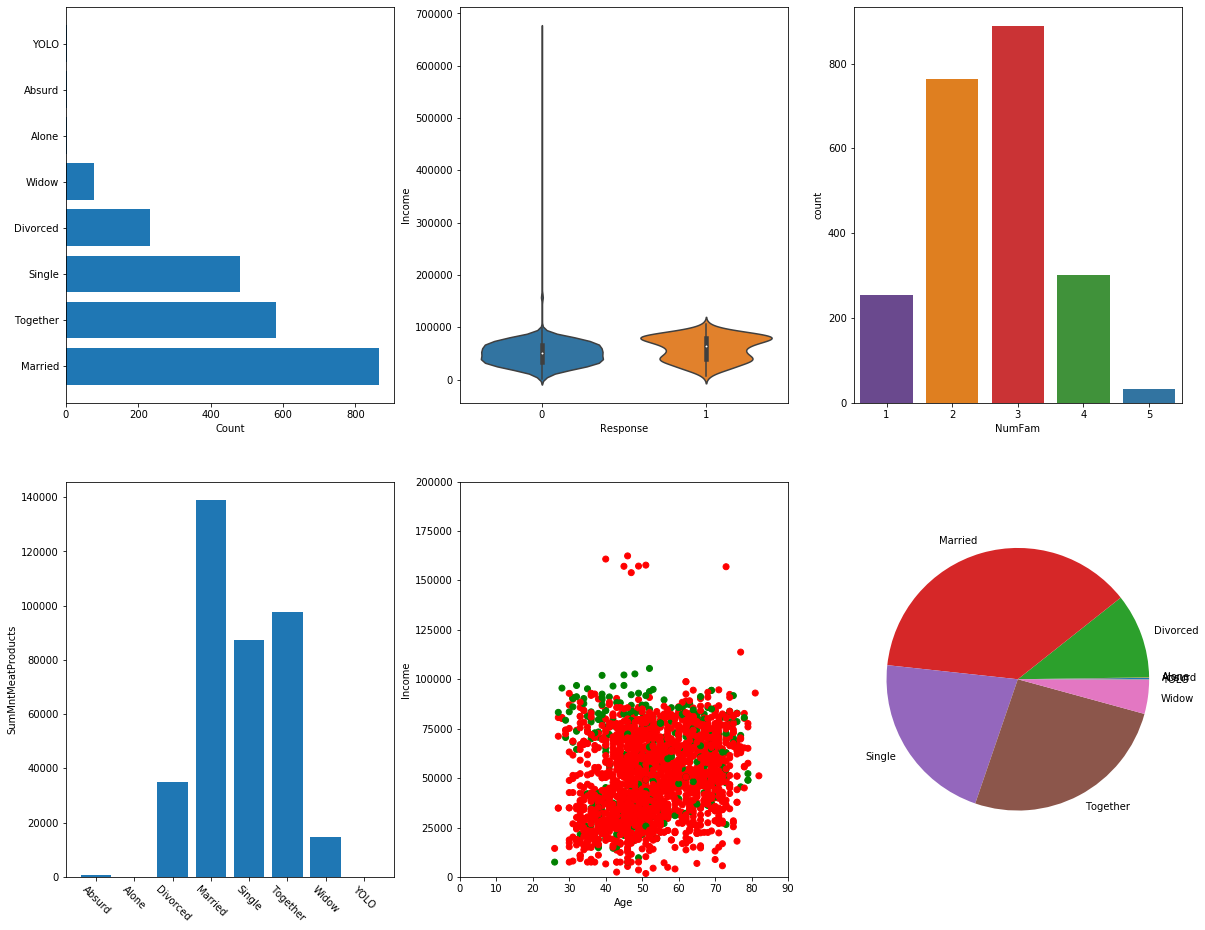

In [447]:
graph, ax = plt.subplots(2,3)
graph.set_size_inches(20, 16)
ax[0][0].barh(data['Marital_Status'].value_counts().index, data.Marital_Status.value_counts())
ax[0][0].set_xlabel('Count')
sns.violinplot(y='Income', x='Response', data=data, split=True, ax=ax[0][1])
sns.countplot(x="NumFam", data=data, palette='Paired_r', ax=ax[0][2])
ax[1][0].bar(data.groupby('Marital_Status')['MntMeatProducts'].sum().index, data.groupby('Marital_Status')['MntMeatProducts'].sum())
ax[1][0].set_xticklabels(data.groupby('Marital_Status')['MntMeatProducts'].sum().index, rotation = -45)
ax[1][0].set_ylabel('SumMntMeatProducts')
ax[1][1].scatter(2022-data['Year_Birth'], data['Income'], c=data['Response'].map({1:'g', 0:'r'}))
ax[1][1].set_xlim([0, 90])
ax[1][1].set_ylim([0, 200000])
ax[1][1].set_ylabel('Income')
ax[1][1].set_xlabel('Age')
ax[1][2].pie(data.groupby('Marital_Status')['TotalSum'].sum(), labels=data.groupby('Marital_Status')['TotalSum'].sum().index)
plt.show()

1.В графе семейное положение у нас есть категории, к которым почти никто не относится. Людей живущих вместе суммарно столько же, сколько людей, живущих по одному.
2.Люди с большим доходом, чаще принимают наши специальные предложения
3.Большинство семей, пользующихся нашими услугами, состоят из 2-3 человек
4.На мясную продукцию больше всего тратятся люди, со статусом "Married"
5.Доход пользователей и показатель "Response" примерно одинаково распределен по возрасту
6.Большинство дохода приходит от людей со статусом "Married"


## Задание 7 (1 балл): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

In [ ]:
# Ваш код и комментарий